### WORKING WITH IMAGE DATA LOADERS 
#### TUTORIAL: Image Data Loaders in PyTorch
##### LINK: https://pyimagesearch.com/2021/10/04/image-data-loaders-in-pytorch/
##### DATASET: https://www.tensorflow.org/datasets/catalog/tf_flowers

In [ ]:
### IMPORTS ###


In [49]:
# config.py
FLOWERS_DATASET_PATH = "../../datasets/flower_photos"
MNIST_DATASET_PATH = "../../datasets/mnist"


TRAIN = "../../datasets/flower_photos/training_data"
VAL = "../../datasets/flower_photos/validation_data"

INPUT_HEIGHT = 640
INPUT_WIDTH = 640

BATCH_SIZE = 8
VAL_SPLIT = 0.1

In [16]:
# build_dataset.py
from imutils import paths
import numpy as np
import shutil
import os


In [18]:
def copy_images(imagePaths, folder):
    # check if the destination folder exists and, if not, create it
    if not os.path.exists(folder):
        os.makedirs(folder)
    
    # loop over the image paths
    
    for path in imagePaths:
        # grabe image name and its label from the path and create
        # a placeholder corresponding to the separate label folder
        imageName = path.split(os.path.sep)[-1]
        label = path.split(os.path.sep)[-2]
        labelFolder = os.path.join(folder, label)
        
        # check to see if the label folder exists and, if not, create it
        if not os.path.exists(labelFolder):
            os.makedirs(labelFolder)
            
        # construct the destination image path and copy the current image to it
        destination = os.path.join(labelFolder, imageName)
        shutil.copy(path, destination)

In [19]:
# load all the image paths and randomly shuffle them
print("[INFO] loading image paths...")
imagePaths = list(paths.list_images(FLOWERS_DATASET_PATH))
np.random.shuffle(imagePaths)

# generate training and validation paths
valPathsLen = int(len(imagePaths) * VAL_SPLIT)
trainPathsLen = len(imagePaths) - valPathsLen
trainPaths = imagePaths[:trainPathsLen]
valPaths = imagePaths[trainPathsLen:]

# copy the training and validation images to their respective directories
print("[INFO] copying training and validation images...")
copy_images(trainPaths, TRAIN)
copy_images(valPaths, VAL)


[INFO] loading image paths...
[INFO] copying training and validation images...


In [ ]:
# load_and_visualize.py

In [21]:
# USAGE
# python load_and_visualize.
# import necessary packages
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import torch

In [23]:
def visualize_batch(batch, classes, dataset_type):
    # initialize a figure
    fig = plt.figure("{} batch".format(dataset_type), figsize=(BATCH_SIZE, BATCH_SIZE))
    
    # loop over the batch size
    for i in range(0, BATCH_SIZE):
        # create subplot
        ax = plt.subplot(2, 4, i + 1)
        
        # grab an image, convert it from channels first ordering to
        # channels last ordering and scale the raw pixels intesities
        # to the range [0, 255]
        image = batch[0][i].cpu().numpy()
        image = image.transpose((1, 2, 0))
        image = (image * 255.0).astype("uint8")
        
        # grabe the label id and get the label from the classes list
        idx = batch[1][i]
        label = classes[idx]
        
        # show the image along with the label
        plt.imshow(image)
        plt.title(label)
        plt.axis("off")
    
    # show the plot
    plt.tight_layout()
    plt.show()

In [27]:
# initialize data augmentation functions
resize = transforms.Resize(size=(INPUT_HEIGHT, INPUT_WIDTH))
hFlip = transforms.RandomHorizontalFlip(p=0.25)
vFlip = transforms.RandomVerticalFlip(p=0.25)
rotate = transforms.RandomRotation(degrees=15)

# initialize our training and validation set adata augmentation pipeline
trainTransforms = transforms.Compose([resize, hFlip, vFlip, rotate, transforms.ToTensor()])
valTransforms = transforms.Compose([resize, transforms.ToTensor()])

In [29]:
# initialize the training and validation dataset
print("[INFO] loading the training and validation dataset...")
trainDataset = ImageFolder(root=TRAIN, transform=trainTransforms)
valDataset = ImageFolder(root=VAL, transform=valTransforms)
print("[INFO] training dataset contains {} samples...".format(len(trainDataset)))
print("[INFO] validation dataset contains {} samples...".format(len(valDataset)))

[INFO] loading the training and validation dataset...
[INFO] training dataset contains 3303 samples...
[INFO] validation dataset contains 367 samples...


In [30]:
# create trainign and validation dataloaders
print("[INFO] creating trainign and validation set dataloaders...")
trainDataLoader = DataLoader(trainDataset, batch_size=BATCH_SIZE, shuffle=True)
valDataLoader = DataLoader(valDataset, batch_size=BATCH_SIZE)

[INFO] creating trainign and validation set dataloaders...


[INFO] visualizing training and validation batch...


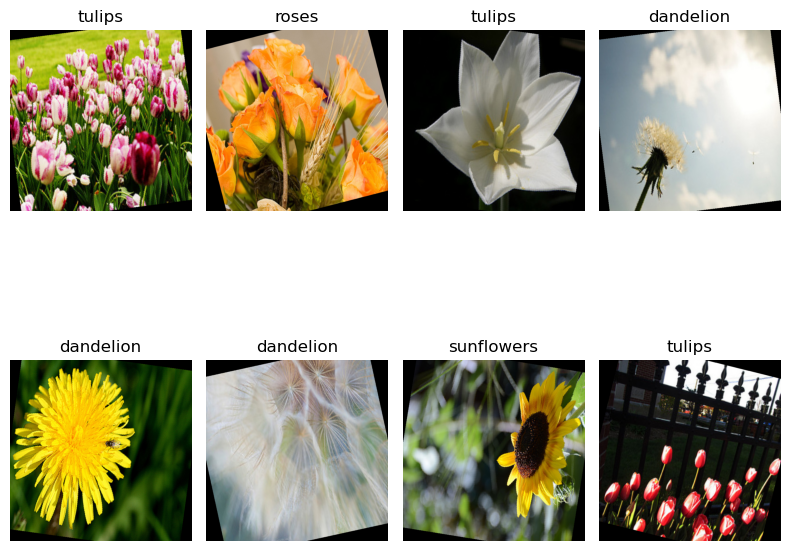

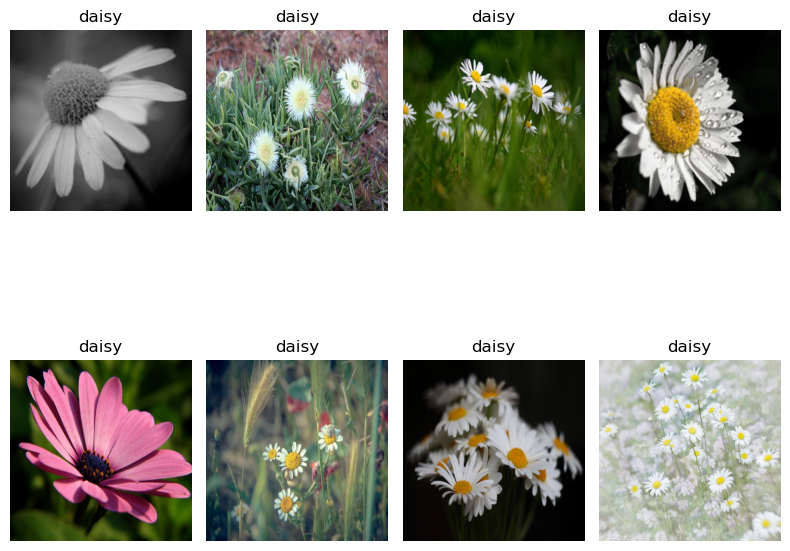

In [40]:
# grab a batch from both training and validation dataloder
trainBatch = next(iter(trainDataLoader))
valBatch = next(iter(valDataLoader))

# visualize the training and validation set batches
print("[INFO] visualizing training and validation batch...")
visualize_batch(trainBatch, trainDataset.classes, "train")
visualize_batch(valBatch, valDataset.classes, "val")

### BUILT-IN DATASETS 

In [41]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

In [47]:
def visualize_batch(batch, classes, dataset_type):
    # initialize a figure
    fig = plt.figure("{} batch".format(dataset_type),
    figsize=(BATCH_SIZE, BATCH_SIZE))
    # loop over the batch size
    for i in range(0, BATCH_SIZE):
        # create a subplot
        ax = plt.subplot(2, 4, i + 1)
        # grab the image, convert it from channels first ordering to
        # channels last ordering, and scale the raw pixel intensities
        # to the range [0, 255]
        image = batch[0][i].cpu().numpy()
        image = image.transpose((1, 2, 0))
        image = (image * 255.0).astype("uint8")
        # grab the label id and get the label from the classes list
        idx = batch[1][i]
        label = classes[idx]
        # show the image along with the label
        plt.imshow(image[..., 0], cmap="gray")
        plt.title(label)
        plt.axis("off")
    # show the plot
    plt.tight_layout()
    plt.show()

In [50]:
# define the transform
transform = transforms.Compose([transforms.ToTensor()])

# initialzie the training and validation dataset
print("[INFO] loading the training and validation dataset...")
trainDataset = MNIST(root=MNIST_DATASET_PATH, train=True, download=True, transform=transform)
valDataset = MNIST(root=MNIST_DATASET_PATH, train=False, download=True, transform=transform)

[INFO] loading the training and validation dataset...


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../../datasets/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ../../datasets/mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../../datasets/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ../../datasets/mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../../datasets/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../datasets/mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../../datasets/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../datasets/mnist/MNIST/raw



[INFO] creating training and validation set dataloaders...
[INFO] visualizing training batch...


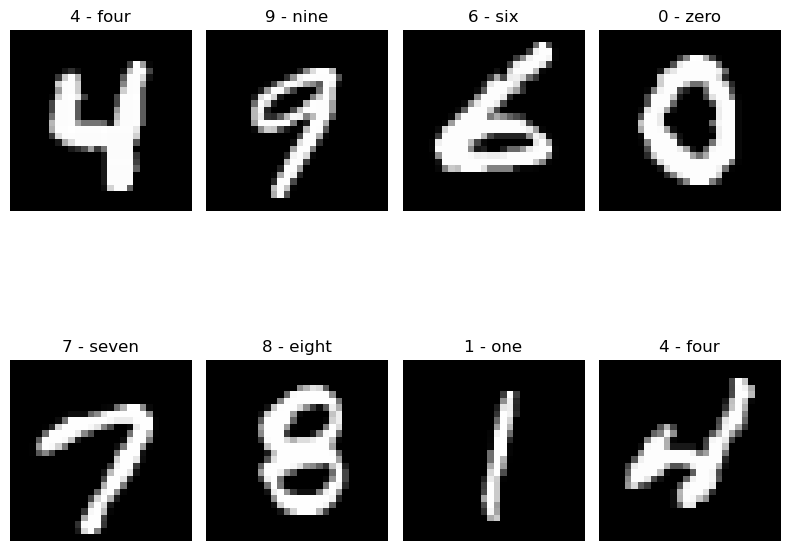

[INFO] visualizing validation batch...


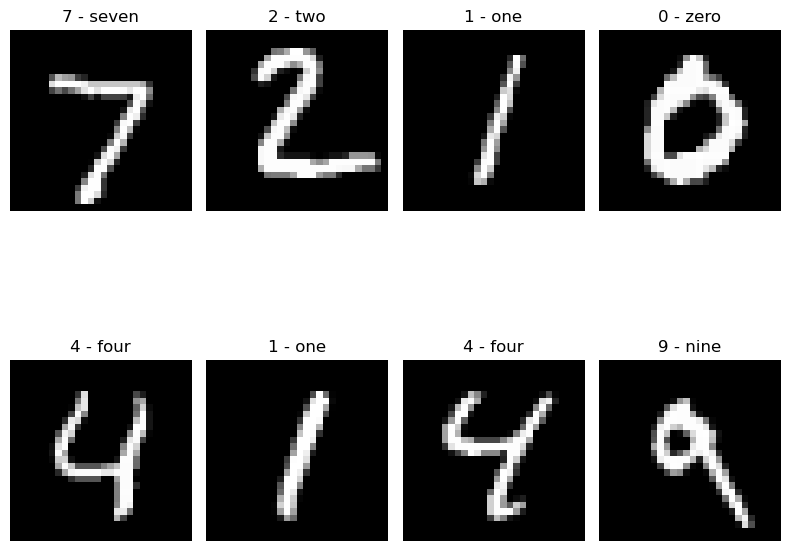

In [51]:
# create training and validation set dataloaders
print("[INFO] creating training and validation set dataloaders...")
trainDataLoader = DataLoader(trainDataset, batch_size=BATCH_SIZE, shuffle=True)
valDataLoader = DataLoader(valDataset, batch_size=BATCH_SIZE)

# grab a batch from both training and validation dataloader
trainBatch = next(iter(trainDataLoader))
valBatch = next(iter(valDataLoader))

# visualize the training set batch
print("[INFO] visualizing training batch...")
visualize_batch(trainBatch, trainDataset.classes, "train")

# visualize the validation set batch
print("[INFO] visualizing validation batch...")
visualize_batch(valBatch, valDataset.classes, "val")